<a href="https://colab.research.google.com/github/swain231/Customer-Classification/blob/main/customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
np.random.seed(42)
n_customers = 1000

In [ ]:
age = np.random.randint(18, 65, n_customers)
income = np.random.randint(20000, 100000, n_customers)
gender = np.random.choice(['M', 'F'], n_customers)
purchase_amount = np.random.uniform(10, 1000, n_customers)
rajashree_value = np.random.randint(0, 2, n_customers)


In [ ]:
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Gender': gender,
    'Purchase_Amount': purchase_amount,
    'Rajashree_Value': rajashree_value
})

In [ ]:
df.to_csv('customer_data.csv', index=False)
print(df.head())

   Age  Income Gender  Purchase_Amount  Rajashree_Value
0   56   25287      F       727.904170                0
1   46   54387      F       199.278794                1
2   32   28512      F       344.880474                0
3   60   21342      F       315.611756                0
4   25   83076      F       947.565628                1


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   int64  
 1   Income           1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Purchase_Amount  1000 non-null   float64
 4   Rajashree_Value  1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


,0
Age,0
Income,0
Gender,0
Purchase_Amount,0
Rajashree_Value,0


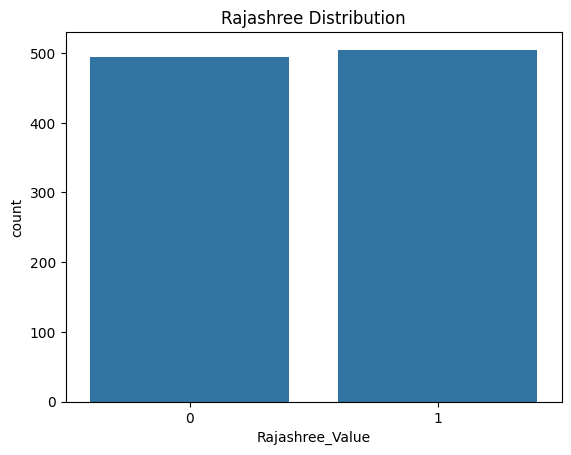

In [ ]:
sns.countplot(x="Rajashree_Value",data=df)
plt.title('Rajashree Distribution')
plt.show()

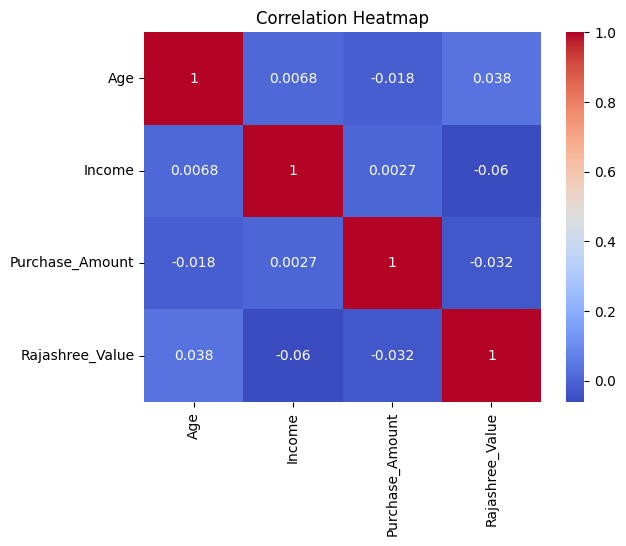

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Generate heatmap using the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x= df.drop('Rajashree_Value',axis=1)
y= df['Rajashree_Value']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Assuming 'df' is your DataFrame
# ... (your previous code) ...

# Convert 'Gender' column to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # drop_first to avoid multicollinearity

# Now, proceed with splitting and model training
x = df.drop('Rajashree_Value', axis=1)
y = df['Rajashree_Value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test, y_pred))

Accuracy_score: 0.465


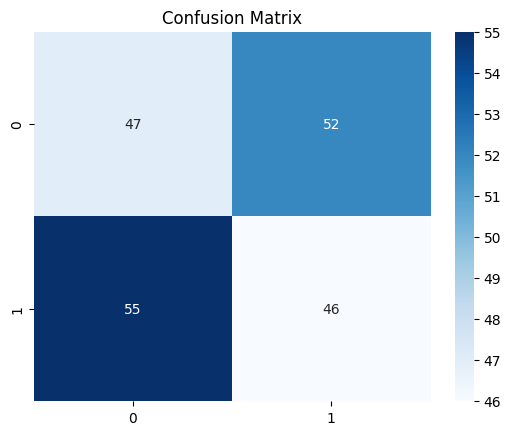

In [ ]:
cm = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
classification_report(y_test,model.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.46      0.47      0.47        99\n           1       0.47      0.46      0.46       101\n\n    accuracy                           0.47       200\n   macro avg       0.47      0.47      0.46       200\nweighted avg       0.47      0.47      0.46       200\n'

In [ ]:
new_customer = pd.DataFrame({
    'Age': [30],
    'Income': [50000],
    'Gender_M': [1],  # Male  Making sure this feature is included
    'Purchase_Amount': [150]
})
# Get the feature names from the training data
feature_names = x_train.columns

# Reindex the new_customer DataFrame to match the training data's feature order
new_customer = new_customer.reindex(columns=feature_names, fill_value=0)

prediction = model.predict(new_customer)[0]
print("prediction",prediction)
if prediction == 1:
    print("The customer is likely to buy Rajashree.")
else:
    print("The customer is not likely to buy Rajashree.")

prediction 1
The customer is likely to buy Rajashree.
